In [61]:
import pandas as pd
file_path = '../Cases/human-resources-analytics/HR_comma_sep.csv'
df = pd.read_csv(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [25]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
X, y = df.drop('left', axis=1), df['left']
X_ohe = pd.get_dummies(X, drop_first=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=24, stratify=y)

In [64]:
# list_of_neighbors = [1,2,3,4,5,6]
import numpy as np
list_of_neighbors = np.arange(1,20)
scores=[]
for neighbor in list_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred, pos_label=0))

best_no_of_neighbors = list_of_neighbors[np.argmax(scores)]
print(f'No of neighbors with highest accuracy : {best_no_of_neighbors}')

No of neighbors with highest accuracy : 2


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3218,  211],
       [  86,  984]], dtype=int64)

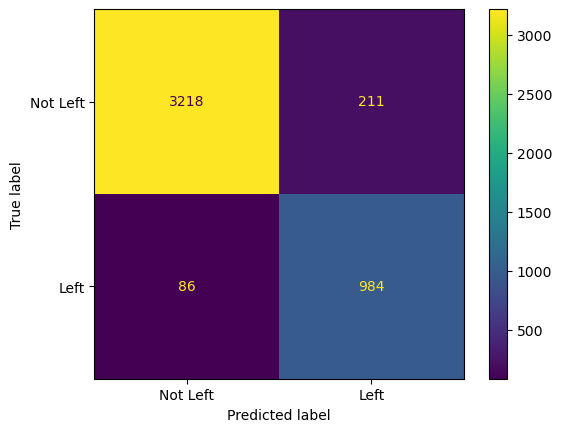

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Left', 'Left'])
disp.plot()

### Recall Score: Proportion of correct predicted labels

In [44]:
from sklearn.metrics import recall_score
rc=recall_score(y_test, y_pred)

In [55]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred, pos_label=1)
ps

0.8234309623430962

In [47]:
f1 = 2*rc*ps/(rc+ps)
f1

0.8688741721854304

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label=1)
f1

0.8688741721854305